In [79]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('./dataset.csv', sep=';')

target = df['Цена']

df = df.drop(columns=['Название', 'Код товара', 'Цена', 'Режимы работы', 'Тип двигателя', 'Класс товара'])

scaler = StandardScaler()
columns_to_normalize = df.columns[df.columns != 'Цена']
df[columns_to_normalize] = df.fillna(df[columns_to_normalize].mean())
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head(10)

,Напряжение аккумулятора,Max крутящий момент,Max диаметр сверления (металл),Max диаметр сверления (дерево),Вес,Емкость аккумулятора,Число оборотов на холостом ходу (первая скорость) (max),Число оборотов на холостом ходу (вторая скорость) (max),Число оборотов на холостом ходу (первая скорость) (min),Число оборотов на холостом ходу (вторая скорость) (min),Размер зажимаемой оснастки (min)
0,-0.265738,-0.549521,-0.480507,-0.527525,-0.081858,-0.078015,-0.325154,-0.699885,-0.345010,-0.720256,-0.429099
1,0.427152,-0.246485,0.507248,0.301596,0.037660,-0.078015,-0.325154,-1.058850,-0.345010,-1.089118,-0.055626
2,-0.727665,-0.549521,-0.480507,-0.829023,-0.171497,-0.078015,-0.251956,0.377010,-0.270468,0.386328,0.093763
3,0.427152,-0.170726,0.177997,-0.150652,-0.111738,-0.076035,-0.325154,-0.699885,-0.345010,-0.720256,-0.429099
4,0.427152,-0.044462,0.177997,-0.150652,-0.111738,-0.076035,-0.325154,-0.699885,-0.345010,-0.720256,-0.429099
5,-0.727665,-0.448509,-0.480507,-1.055147,-0.261135,-0.076035,-0.383713,-0.699885,-0.404645,-0.720256,-0.279710
6,-0.958628,-0.448509,-0.480507,-1.055147,-0.261135,-0.076035,-0.383713,-0.699885,-0.404645,-0.720256,-0.279710
7,0.427152,-0.423256,-0.480507,-0.527525,-0.171497,-0.076035,-0.325154,-0.699885,-0.345010,-0.720256,-0.429099
8,-0.727665,-0.448509,-0.480507,-1.055147,-0.261135,-0.076035,-0.383713,-0.699885,-0.404645,-0.720256,-0.279710
9,0.427152,-0.246485,0.507248,0.301596,-0.071998,-0.078015,-0.325154,-0.699885,-0.345010,-0.720256,-0.055626


In [81]:
x, test_x, y, test_y = train_test_split(df, target, train_size=0.7)
train_x, valid_x, train_y, valid_y = train_test_split(x, y, train_size=0.7)

train = [train_x, train_y]
valid = [valid_x, valid_y]
test = [test_x, test_y]

In [82]:
class ErrorModel:
    def __init__(self, method, param):
        self.model = method(param)
            
    def error(self, data):
        pred = self.model.predict(data[0])
        err = mean_squared_error(data[1], pred)
        return err
    
    def fit(self, data_x, data_y):
        self.model.fit(data_x, data_y)
        
    
def run_params(train, valid, test, method, params):
    error_train = []
    error_valid = []
    error_test = []
        
    for param in params:
        model = ErrorModel(method, param)
        model.fit(train[0], train[1]) 

        error_train.append(model.error(train))
        error_valid.append(model.error(valid))
        error_test.append(model.error(test))
        
    return error_train, error_valid, error_test        

def run_and_plot(train, valid, test, method, params):
    error_train, error_valid, error_test = run_params(train, valid, test, method, params)
    plt.plot(params, error_train, 'b', params, error_valid, 'g', params, error_test, 'r')
    plt.show()

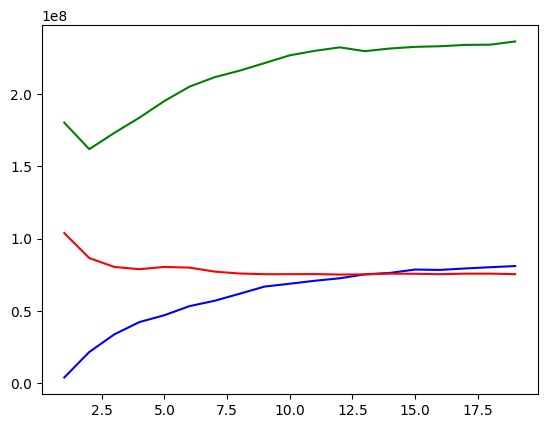

In [83]:
run_and_plot(train, valid, test,
             lambda x: KNeighborsRegressor(n_neighbors=x),
             [i for i in range(1, 20)])

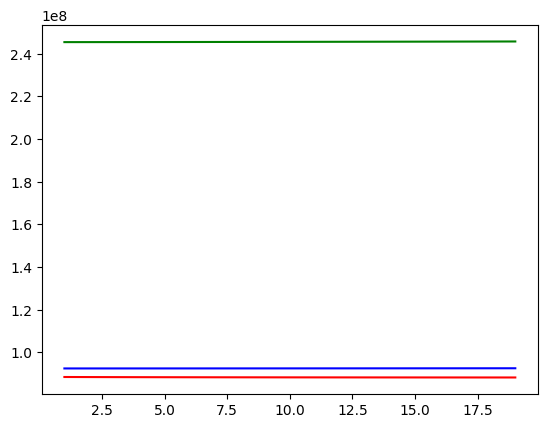

In [84]:
run_and_plot(train, valid, test,
             lambda x: Ridge(alpha=x),
             [i for i in range(1, 20)])

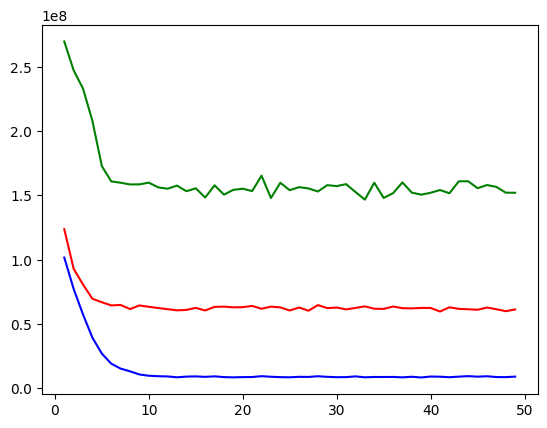

In [85]:
run_and_plot(train, valid, test,
             lambda x: RandomForestRegressor(max_depth=x),
             [i for i in range(1, 50)])

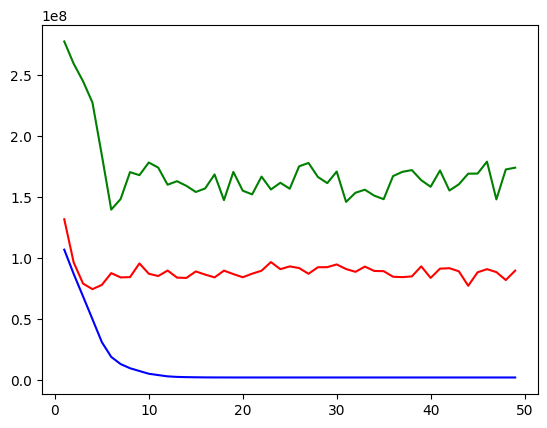

In [86]:
run_and_plot(train, valid, test,
             lambda x: DecisionTreeRegressor(max_depth=x),
             [i for i in range(1, 50)])